In a logit regression model, the dependent variable is categorical (binary: true, false, etc.).

In [ ]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [2]:
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

X, y = make_two_blobs()
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

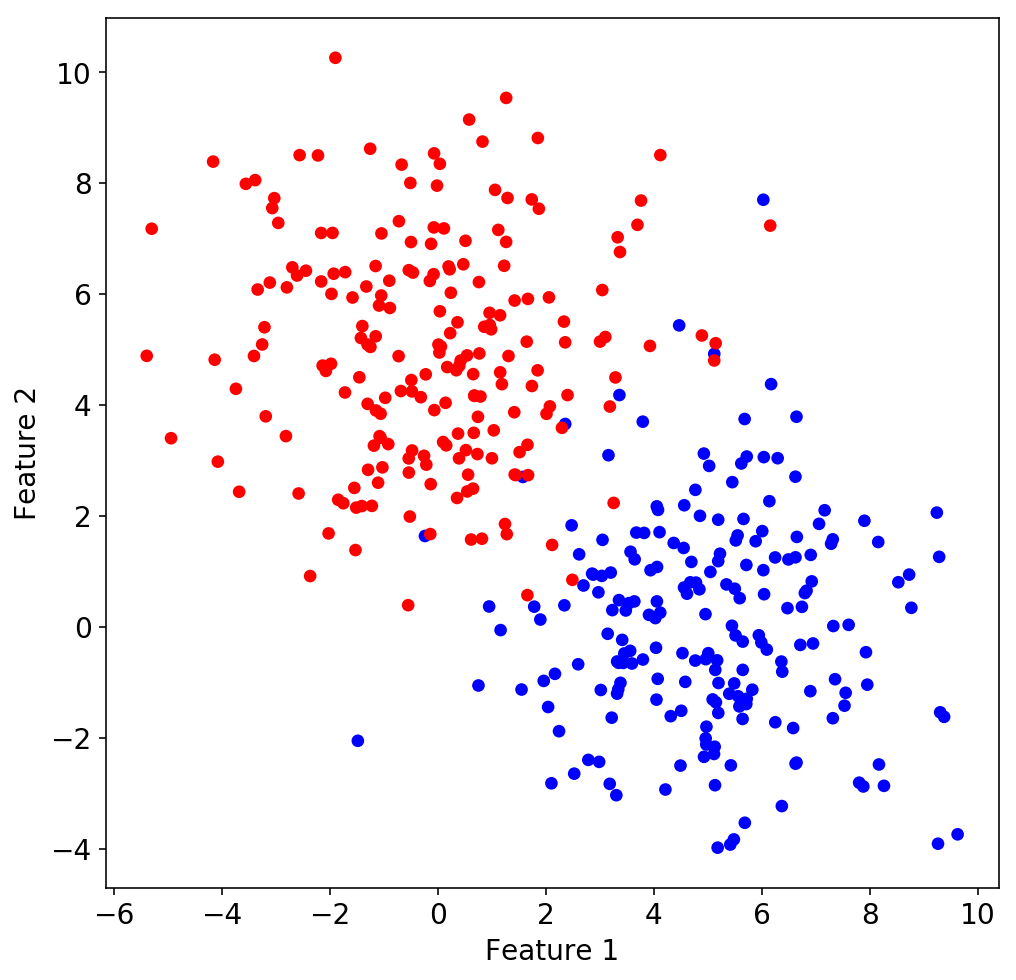

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

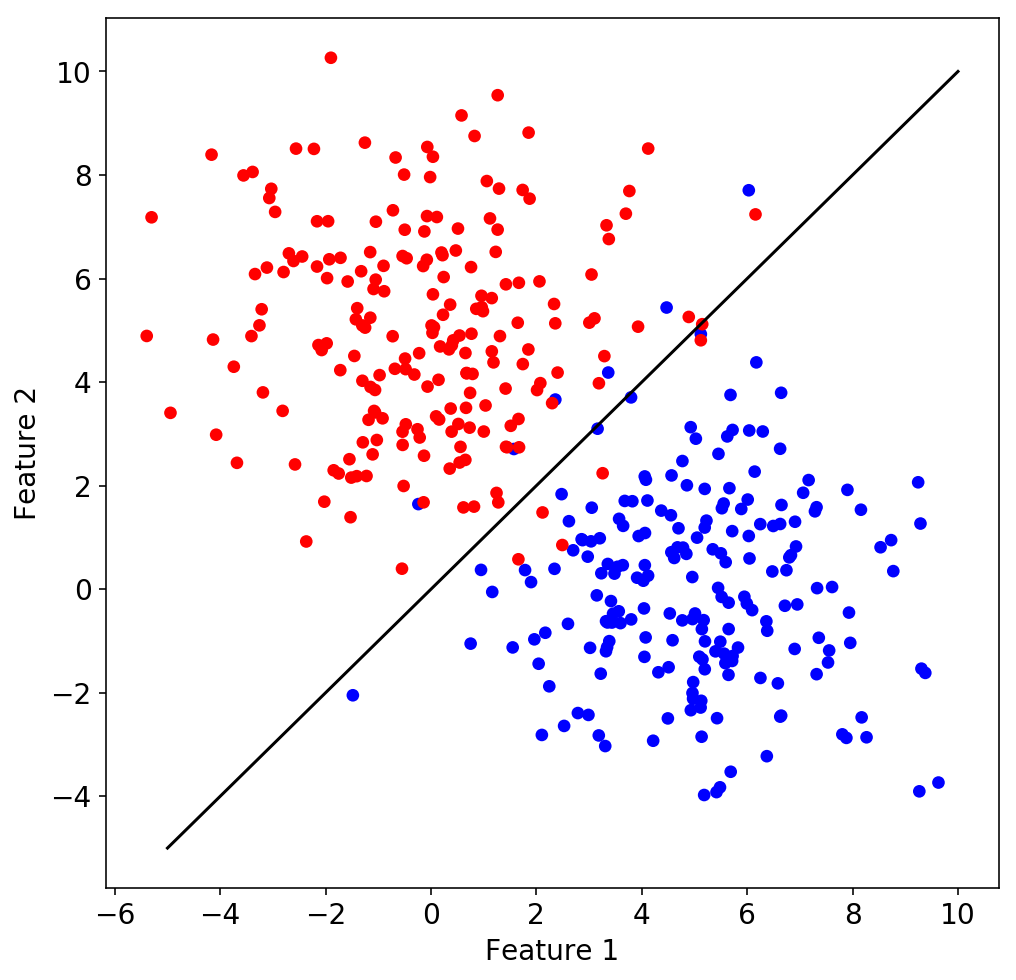

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

line = np.linspace(-5, 10, 100).reshape(-1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.plot(line, line, '-k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

One cluster of data is centered a (0,5) while the other is at (5,0). Since the data are normaly distributed, a simple linear function y=x should be enough to separate the clusters.

In [35]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

rgr = LogisticRegression()
rgr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:

coef=rgr.coef_
intercept = rgr.intercept_
print(coef)
print(intercept)

[[-1.39499232  1.50100056]]
[-0.14607058]


In [88]:
def line(x0):
    return (-(x0 * coef[0, 0]) - intercept[0]) / coef[0, 1]


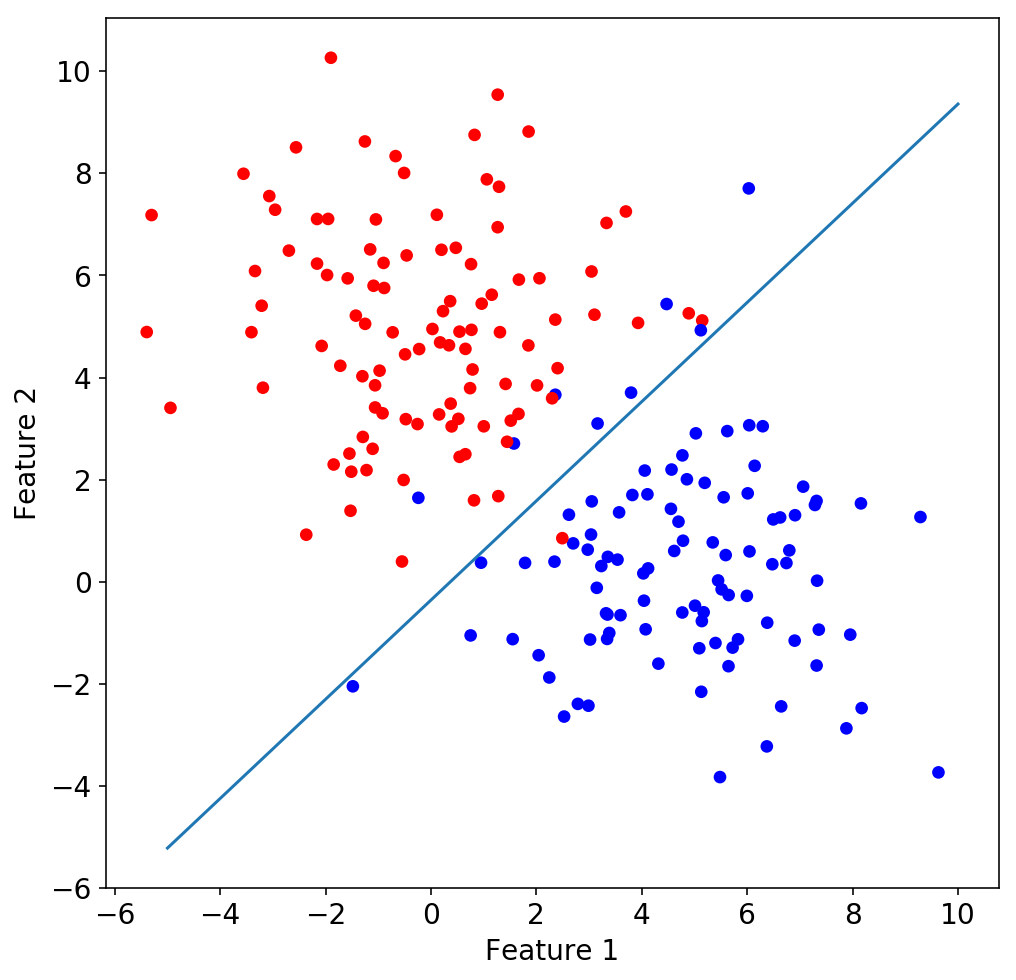

In [180]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, lw=0, s=40)
plt.plot([-5., 10.], [line(-5.), line(10.)],
                 ls="-")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

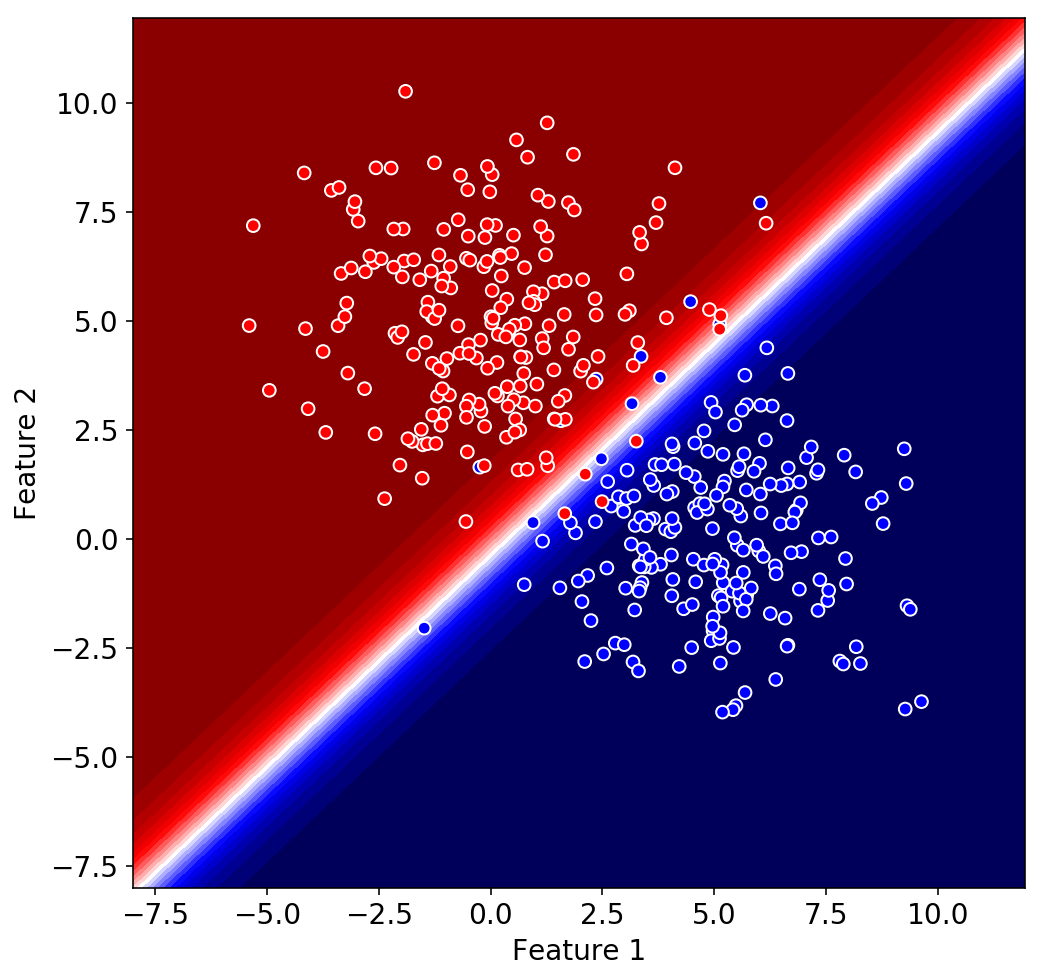

In [181]:
xx, yy = np.mgrid[-8:12:.05, -8:12:.05]
grid = np.c_[xx.ravel(), yy.ravel()]
proba = rgr.predict_proba(grid)[:, 1].reshape(xx.shape)

contour = plt.contourf(xx, yy, proba, 25, cmap="seismic",
                      vmin=0, vmax=1)

plt.scatter(X[:,0], X[:, 1], c=y, s=40,
           cmap="seismic", edgecolor="white", linewidth=1)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

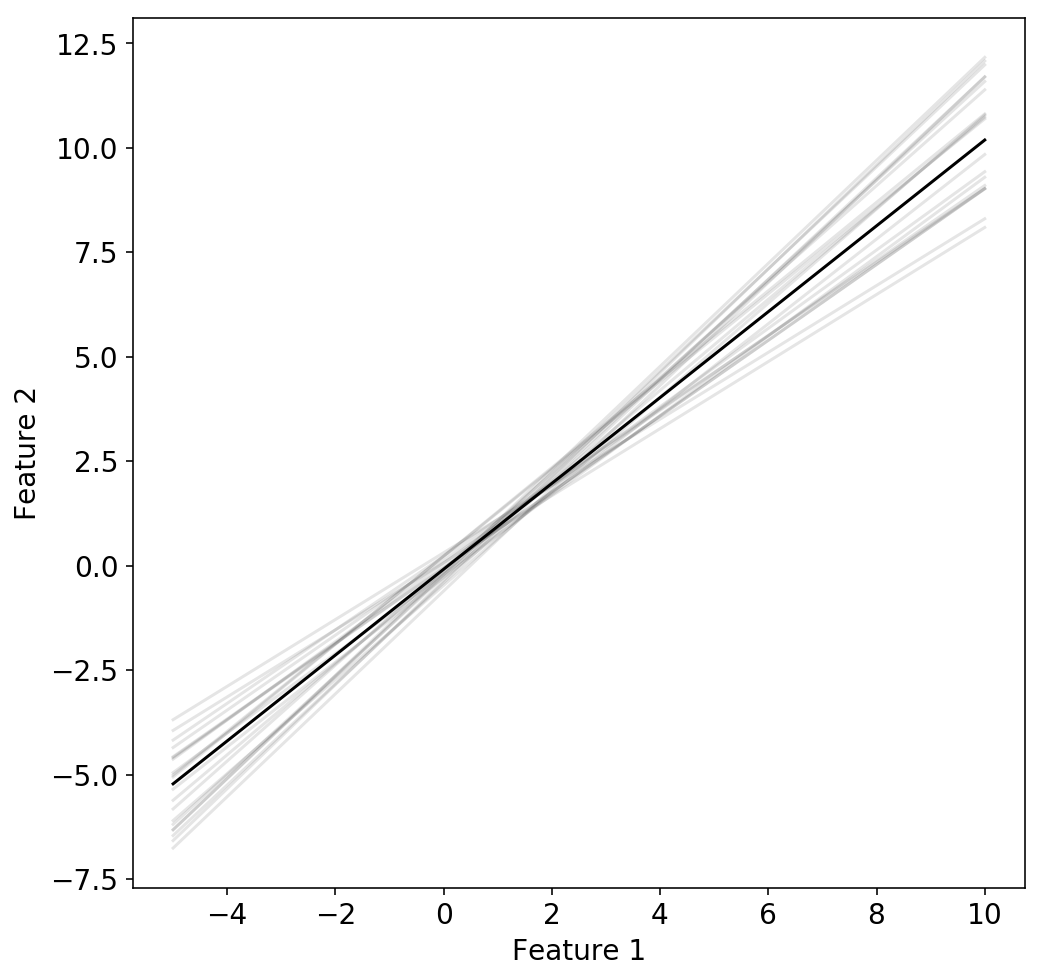

In [204]:
coef1 = []
coef2 = []
intercep=[]

for n in range(20):
    X, y = make_two_blobs()
    labels = ['b', 'r']
    y = np.take(labels, (y < 0.5))
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

    rgr = LogisticRegression()
    rgr.fit(X_train, y_train)

    coef=rgr.coef_
    intercept = rgr.intercept_
    coef1.append(coef[0,0])
    coef2.append(coef[0,1])
    intercep.append(intercept[0])
    def line(x0):
        return (-(x0 * coef[0, 0]) - intercept[0]) / coef[0, 1]
    plt.plot([-5., 10.], [line(-5.), line(10.)],'-k', alpha=0.1)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
av_c1=sum(coef1)/20
av_c2=sum(coef2)/20
av_i=sum(intercep)/20

def line(x0):
    return (-(x0 * av_c1) - av_i) / av_c2
plt.plot([-5., 10.], [line(-5.), line(10.)],'-k')

Since the decision boundary is relatively stable among all different samples, I believe that the bias is not a problem in this setup.